**BIBLIOTECAS INSTALADAS**


In [ ]:
pip install cryptography

In [ ]:
pip install simple-crypt

**IMPORTAÇÕES NECESSÁRIAS**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from simplecrypt import encrypt, decrypt
import itertools
from random import choice
import string, time


**FUNÇÕES APLICADAS PARA CRIPTOGRAFIA SIMÉTRICA E ASSIMÉTRICA**

In [ ]:
# FUNÇÃO PARA GERAÇÃO DE GRÁFICOS COM APENAS UMA INFORMAÇÃO

def plotagem(tempo, titulo, legX, legY,leg):
  plt.figure(figsize=(20,10))
  plt.style.use("seaborn-dark")
  palette = plt.get_cmap("Dark2")
  plt.title(titulo)
  valueX = [x[0] for x in tempo]
  valueY = [y[1] for y in tempo]
  plt.xticks(valueX)
  #plt.yticks(valueY)
  plt.plot(valueX, valueY, color=palette(7), label=leg) 
  plt.plot(valueX, valueY, 'o', color=palette(3)) 
  plt.xlabel(legX) 
  plt.ylabel(legY) 
  plt.savefig(f'{titulo.replace(" ", "")}')
  plt.show()

In [ ]:
# FUNÇÃO UTILIZADA PARA PLOTAR DUAS INFORMAÇÕES NO MESMO GRÁFICO

def plotagem2(tempo1, tempo2, titulo, legX, legY, leg1, leg2):
  plt.figure(figsize=(20,10))
  plt.style.use("seaborn-dark")
  palette = plt.get_cmap("Dark2")
  plt.title(titulo)
  valueX1 = [x[0] for x in tempo1]
  valueY1 = [y[1] for y in tempo1]
  valueY2 = [y[1] for y in tempo2]
  plt.xticks(valueX1)
  plt.plot(valueX1, valueY1, color=palette(7), label=leg1) 
  plt.plot(valueX1, valueY1, 'o', color=palette(3) ) 
  plt.plot(valueX1, valueY2, '--',color=palette(7), label=leg2)
  plt.plot(valueX1, valueY2, 'o', color=palette(1)) 
  plt.xlabel(legX) 
  plt.ylabel(legY) 
  plt.legend()
  plt.savefig(f'{titulo.replace(" ", "")}')
  plt.show()

In [ ]:
# FUNÇÃO QUE DESCARTA MENOR E MAIOR DIGITO PARA GERAR MÉDIA DE TEMPOS
def calcularMedia(tempo:list):
  tempo.sort()
  print("Tempos totais:", tempo)
  del tempo[0]
  del tempo[-1]
  media = sum(tempo)/len(tempo)
  print ("Média tempo:", media)
  return media

# **CRIPTOGRAFIA SIMÉTRICA**

In [ ]:
# FUNÇÃO PARA ENCRIPTAR COM CHAVE SIMÉTRICA

def encriptacaoSimetrica(chave, mensagem):
  cifra = encrypt(chave, mensagem)
  return cifra

In [ ]:
# FUNÇÃO DE FORÇA BRUTA PARA QUEBRAR A SENHA SIMÉTRICA

mensagem = ""
def gerar_quebra(valores, tamanho, cifra):
  comb = [p for p in itertools.product(valores, repeat=tamanho)]
  for i in comb:
    try:
      mensagem = decrypt(*[''.join(i)], cifra)
      break
    except:
      print(i)
      continue
      
  return mensagem

In [ ]:
# FUNÇÃO PARA GERAR AS CHAVES SIMÉTRICAS

def gerarChaveSimetrica(valores, tamanho):
  chave = ''
  for j in range(0, tamanho):
    chave += choice(valores)
  return str(chave)

In [ ]:
tam = 2 # tamanho inicial da chave
valores = ["0","1"] #["0","1"] # contém o tipo de string que comporá a chave, podendo ser também string.ascii_lowercase, string.ascii_uppercase, string.ascii_letters, string.punctuation 
medGeracao = []
medEncriptacaoSimetrica = []
medDecriptacaoSimetrica = []
tempoGS = []
tempoES = []
tempoQS = []
tempoCifragem = []
tempoQuebra =[]
mensagem = b'Esta eh uma mensagem para voce'

for i in range(0,13): #Laço para incrementar o tamanho máximo da chave
  for i in range(0,5): #Laço para incrementar a quantidade de vezes que será gerada a chave de mesmo tamanho
    iniCont = time.process_time()
    senha = gerarChaveSimetrica(valores,tam)
    fimCont = time.process_time()
    tempoGS.append(fimCont-iniCont)
    iniCont = time.process_time()
    cifra = encriptacaoSimetrica(senha, mensagem)
    fimCont = time.process_time()
    tempoES.append(fimCont-iniCont)
    print(senha)
  medGeracao.append([tam, calcularMedia(tempoGS)])
  medEncriptacaoSimetrica.append([tam, round(calcularMedia(tempoES),2)])
  tempoGS.clear()
  tempoES.clear()
  tempoQS.clear()
  tam*=2
plotagem(medGeracao, "Criptografia Simétrica - Geração de chave", "Tamanho da chave em bits", "Tempo em segundos","Simétrica")
plotagem(medEncriptacaoSimetrica, "Criptografia Simétrica - Encriptação", "Tamanho da chave em bits", "Tempo em segundos","Simétrica")

[[2, 2.1100333318220994e-05], [4, 4.7366333357482894e-05], [8, 6.992999999511085e-05], [16, 6.018033328321811e-05], [32, 8.549466667773231e-05], [64, 0.00011705000004743245], [128, 0.00015753799993944995], [256, 0.0002938623333648138], [512, 0.0005242553333270431], [1024, 0.0009769823333272143], [2048, 0.0019355826666848468], [4096, 0.003857076666690773], [8192, 0.008172683333327768]]
[[2, 1.8], [4, 1.8], [8, 1.78], [16, 1.78], [32, 1.79], [64, 1.77], [128, 2.4], [256, 2.48], [512, 2.65], [1024, 2.96], [2048, 3.63], [4096, 4.82], [8192, 7.22]]
[[2, 2.1100333318220994e-05], [4, 4.7366333357482894e-05], [8, 6.992999999511085e-05], [16, 6.018033328321811e-05], [32, 8.549466667773231e-05], [64, 0.00011705000004743245], [128, 0.00015753799993944995], [256, 0.0002938623333648138]]
[[2, 1.8], [4, 1.8], [8, 1.78], [16, 1.78], [32, 1.79], [64, 1.77], [128, 2.4], [256, 2.48]]


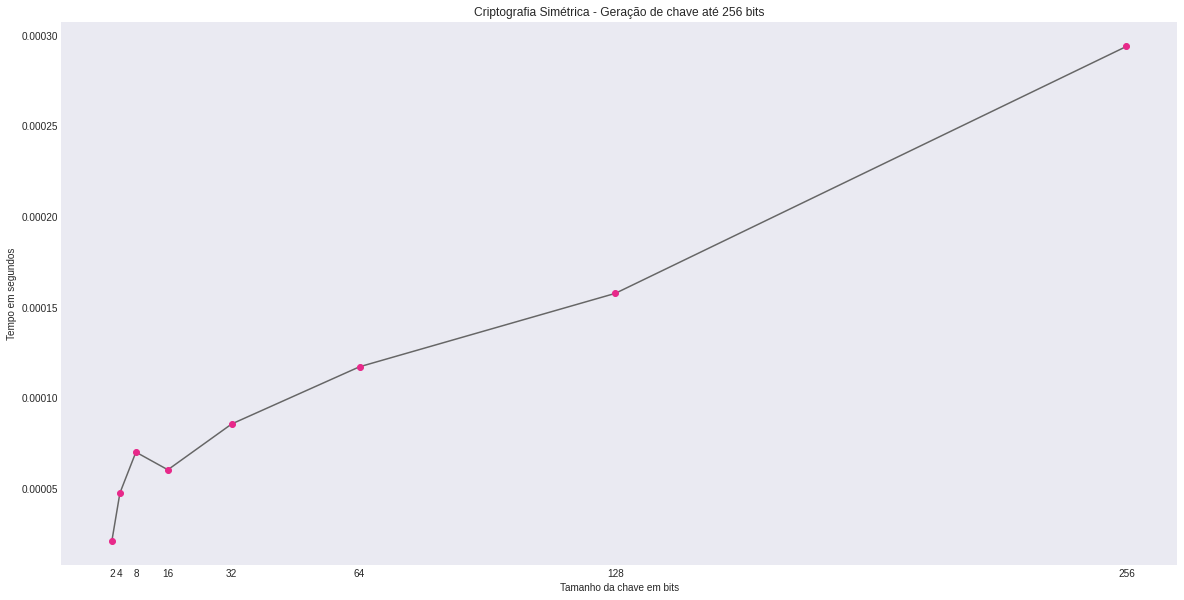

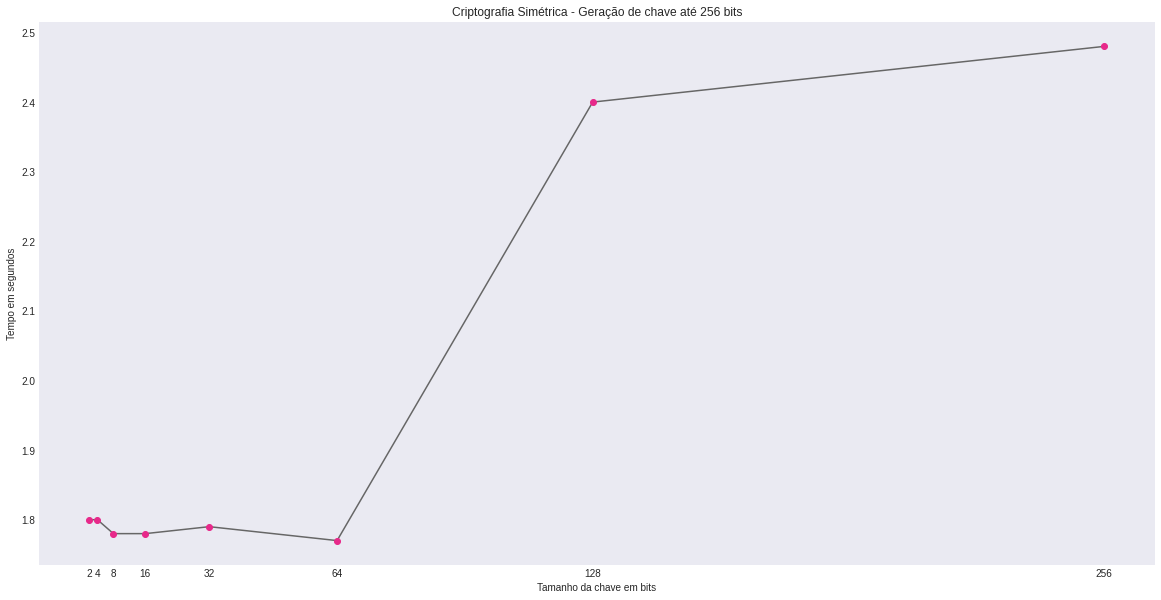

In [ ]:
print(medGeracao)
print(medEncriptacaoSimetrica)
medGeracaoSimetrica256=[]
medEncriptacaoSimetrica256=[]
for i in range (0,8):
  medGeracaoSimetrica256.append(medGeracao[i])
  medEncriptacaoSimetrica256.append(medEncriptacaoSimetrica[i])
print(medGeracaoSimetrica256)
print(medEncriptacaoSimetrica256)
plotagem(medGeracaoSimetrica256, "Criptografia Simétrica - Geração de chave até 256 bits", "Tamanho da chave em bits", "Tempo em segundos","Simétrica")
plotagem(medEncriptacaoSimetrica256, "Criptografia Simétrica - Geração de chave até 256 bits", "Tamanho da chave em bits", "Tempo em segundos","Simétrica")

In [ ]:
import time
chave = ["01", "0011", "00010111", "0000000100100100"]
mensagem = b"Uma mensagem para voce"
valores = ["0", "1"]
medDecriptacaoSimetrica = []
tam = 2
for i in range(0,4):
  cifra = encriptacaoSimetrica(chave[i], mensagem)
  iniCont = time.process_time()
  decifrado = gerar_quebra(valores,tam,cifra)
  fimCont = time.process_time()
  medDecriptacaoSimetrica.append([tam, round((fimCont-iniCont),2)])
  tam*=2

[[2, 3.67], [4, 7.19], [8, 43.41], [16, 537.49]]


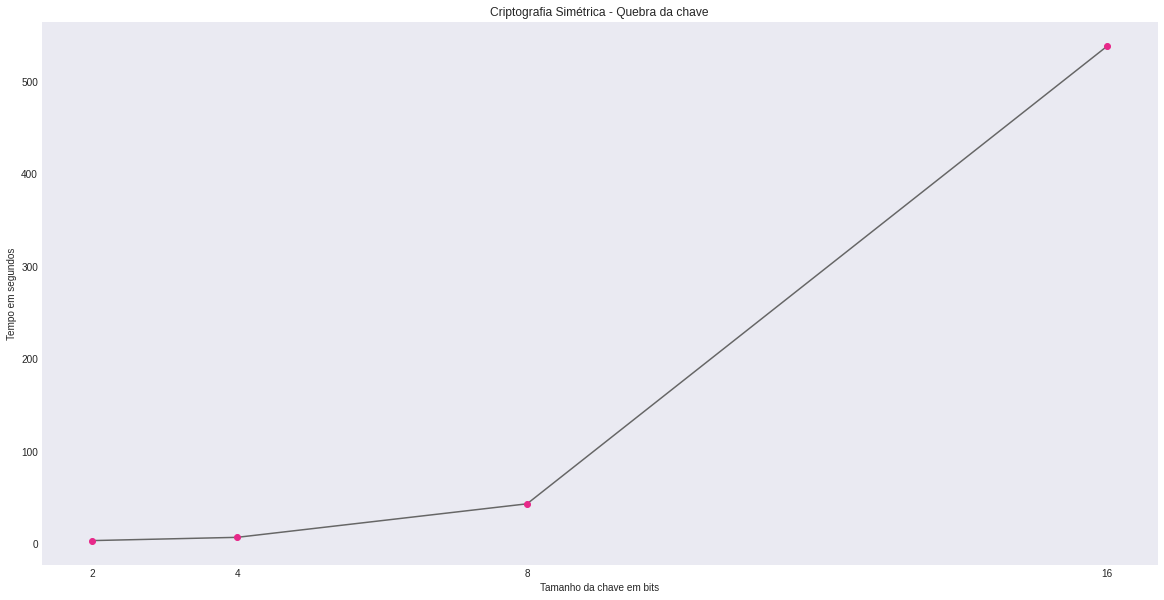

In [ ]:
print(medDecriptacaoSimetrica)
plotagem(medDecriptacaoSimetrica, "Criptografia Simétrica - Quebra da chave", "Tamanho da chave em bits", "Tempo em segundos","Simétrica")

# **CRIPTOGRAFIA ASSIMÉTRICA**


In [ ]:
from cryptography.hazmat.primitives import hashes, serialization
from cryptography.hazmat.primitives.asymmetric import rsa, padding

In [ ]:
#FUNÇÃO UTILIZADA PARA ARMAZENAR A CHAVE PRIVADA EM FORMATO BINÁRIO
#UTILIZADO PARA A DEMONSTRAÇÃO DE ENCRIPTAÇÃO, DECRIPTAÇÃO E ASSINATURA 

def salvarChavePrivada(tamChave, i, chave):
  with open(f'{tamChave}_privada{i}.key', 'wb') as f:
    f.write(chave)

In [ ]:
#FUNÇÃO PARA ARMAZENAS MENSAGEM CIFRADA

def salvarEncriptacaoAssimetrica(txtCifrado, i, tamChave):
  with open(f'{tamChave}_txtCifrado{i}', 'wb') as f:
    f.write(txtCifrado)

In [ ]:
# FUNÇÃO PARA CARREGAMENTO DA CHAVE PRIVADA

def carregarChavePrivada(tamChave):
  with open(f"{tamChave}_privada0.key", "rb") as f:
    chave = f.read()
  return chave

In [ ]:
# FUNÇÃO DE GERAÇÃO DE PAR DE CHAVES

def gerarParChaves(tamChave):
  chave = rsa.generate_private_key(public_exponent=3,key_size=tamChave)
  return chave

In [ ]:
# FUNÇÃO PARA SERIALIZAÇÃO DA CHAVE PRIVADA

def serializacaoPrivada(chavePrivada):
  pem = chavePrivada.private_bytes(encoding=serialization.Encoding.PEM,format=serialization.PrivateFormat.PKCS8,encryption_algorithm=serialization.NoEncryption())
  return pem

In [ ]:
# FUNÇÃO PARA ENCRIPTAÇÃO DE MENSAGEM
def encriptacaoAssimetrica(mensagem, tamChave):
  chave = carregarChavePrivada(tamChave)
  chavePrivada = serialization.load_pem_private_key(chave, password=None)
  chavePublica = chavePrivada.public_key()
  textoCifrado = chavePublica.encrypt(
      mensagem,
      padding.OAEP(
          mgf=padding.MGF1(algorithm=hashes.SHA1()),
          algorithm=hashes.SHA1(),
          label=None
      )
  )
  return textoCifrado

In [ ]:
# FUNÇÃO PARA ASSINATURA DE MENSAGEM E/OU DOCUMENTOS

def assinarDocumento(mensagem, tamChave):
  chave = carregarChavePrivada(tamChave)
  chavePrivada = serialization.load_pem_private_key(chave, password=None)
  docAssinado = chavePrivada.sign(
      mensagem,
      padding.PSS(
          mgf=padding.MGF1(hashes.SHA256()),
          salt_length=padding.PSS.MAX_LENGTH
      ),
      hashes.SHA256()
  )
  return docAssinado



In [ ]:
# FUNÇÃO PARA VERIFICAÇÃO DE ASSINATURA 

def verificarAssinatura(docAssinado, mensagem, tamChave):
  chave = carregarChavePrivada(tamChave)
  chavePrivada = serialization.load_pem_private_key(chave, password=None)
  chavePublica = chavePrivada.public_key()
  try:
    chavePublica.verify(
        docAssinado,
        mensagem,
        padding.PSS(
            mgf=padding.MGF1(hashes.SHA256()),
            salt_length=padding.PSS.MAX_LENGTH
        ),
        hashes.SHA256()
    )
    print("A mensagem foi assinada pela chave privada correspondente")
  except:
    print("A mensagem não foi assinada pela chave privada correspondente")

  

In [ ]:
# FUNÇÃO PARA DECRIPTAÇÃO DE MENSAGEM

def decriptacaoAssimetrica(txtCifrado, tamChave):
  chave = carregarChavePrivada(tamChave)
  chavePrivada = serialization.load_pem_private_key(chave, password=None)
  txtDecifrado = chavePrivada.decrypt(
      txtCifrado,
      padding.OAEP(
          mgf=padding.MGF1(algorithm=hashes.SHA1()),
          algorithm=hashes.SHA1(),
          label=None
      )
  )
  return txtDecifrado


Tempos totais: [0.01197748100003082, 0.012417345000017121, 0.01772251799991409, 0.022856908999983716, 0.04333915400002297]
Média tempo: 0.01766559066663831
Tempos totais: [0.02928079399998751, 0.039305558000023666, 0.04725262900001326, 0.05061960199998339, 0.05255877699994471]
Média tempo: 0.04572592966667344
Tempos totais: [0.26742238799999996, 0.29295744499995635, 0.40747667499999807, 0.4830168790000471, 0.5082813779999924]
Média tempo: 0.3944836663333338
Tempos totais: [1.0482480389999864, 1.8537183660000665, 2.2919580760000144, 2.5663211999999476, 4.747788259999993]
Média tempo: 2.237332547333343
Tempos totais: [18.677577230999987, 20.489345920000005, 23.675758683000026, 32.18157372999997, 36.13960826799996]
Média tempo: 25.448892777666668
Tempos totais: [0.004578809999998157, 0.004639588000031836, 0.004650890999982948, 0.004659188000005088, 0.008267046000014489]
Média tempo: 0.004649889000006624
Tempos totais: [0.008280962999947405, 0.008289034999961586, 0.008296087999951851, 0.00

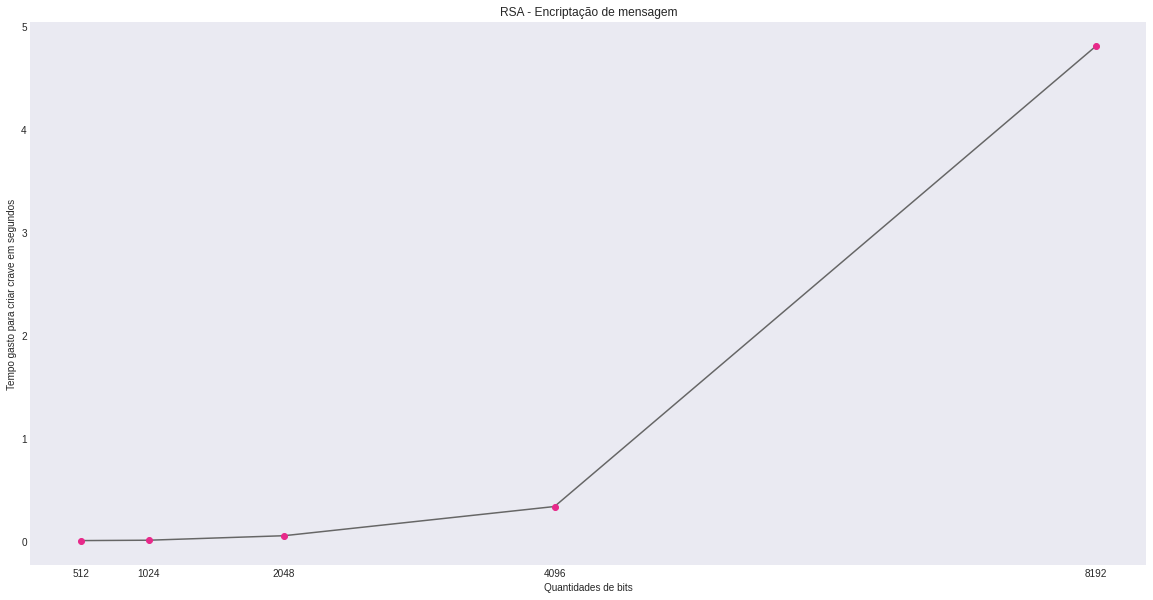

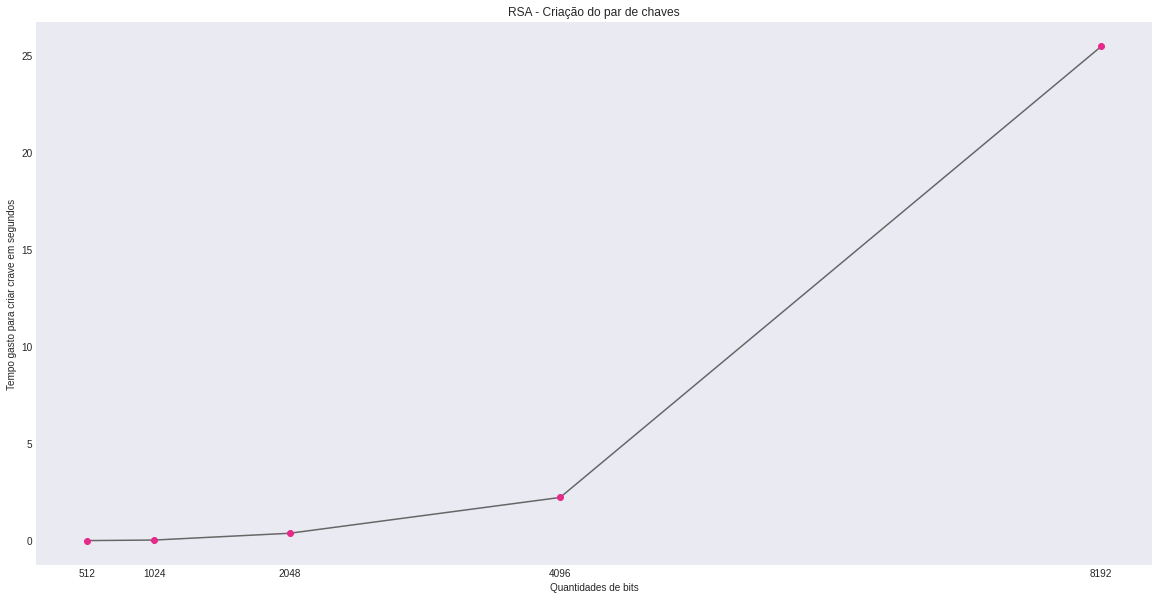

In [ ]:
mensagem = b"Uma mensagem para voce"
mensagem_byte = bytes(mensagem, encoding='utf-8') if not isinstance(mensagem, bytes) else mensagem
tam = 512
tempo=[]
tempoGeracaoRSA=[]
tempoEncriptacaoRSA=[]

for j in range(0,5):
  for i in range (0,5):
    iniCont = time.process_time()
    chavePrivada = gerarParChaves(tam)
    chavePublica = chavePrivada.public_key()
    fimCont = time.process_time()
    tempo.append(fimCont-iniCont)
    pem = serializacaoPrivada(chavePrivada)
    salvarChavePrivada(tam, i, pem)
  tempoGeracaoRSA.append([tam,calcularMedia(tempo)])
  tempo.clear()
  tam*=2

tam=512
for j in range (0,5):
  for i in range(0,5):
    iniCont = time.process_time()
    txtCifrado = encriptacaoAssimetrica(mensagem, tam)
    fimCont = time.process_time()
    tempo.append(fimCont-iniCont)
    salvarEncriptacaoAssimetrica(txtCifrado, i, tam)
  tempoEncriptacaoRSA.append([tam,calcularMedia(tempo)])
  tempo.clear()
  tam*=2
plotagem(tempoEncriptacaoRSA, "RSA - Encriptação de mensagem", "Quantidades de bits", "Tempo gasto para criar crave em segundos", "Assimétrica") 
plotagem(tempoGeracaoRSA, "RSA - Criação do par de chaves", "Quantidades de bits", "Tempo gasto para criar crave em segundos", "Assimétrica") 

docAssinado = assinarDocumento(mensagem_byte, tam)
resultado = verificarAssinatura(docAssinado, mensagem_byte, tam)
txtDecifrado = decriptacaoAssimetrica(txtCifrado, tam)


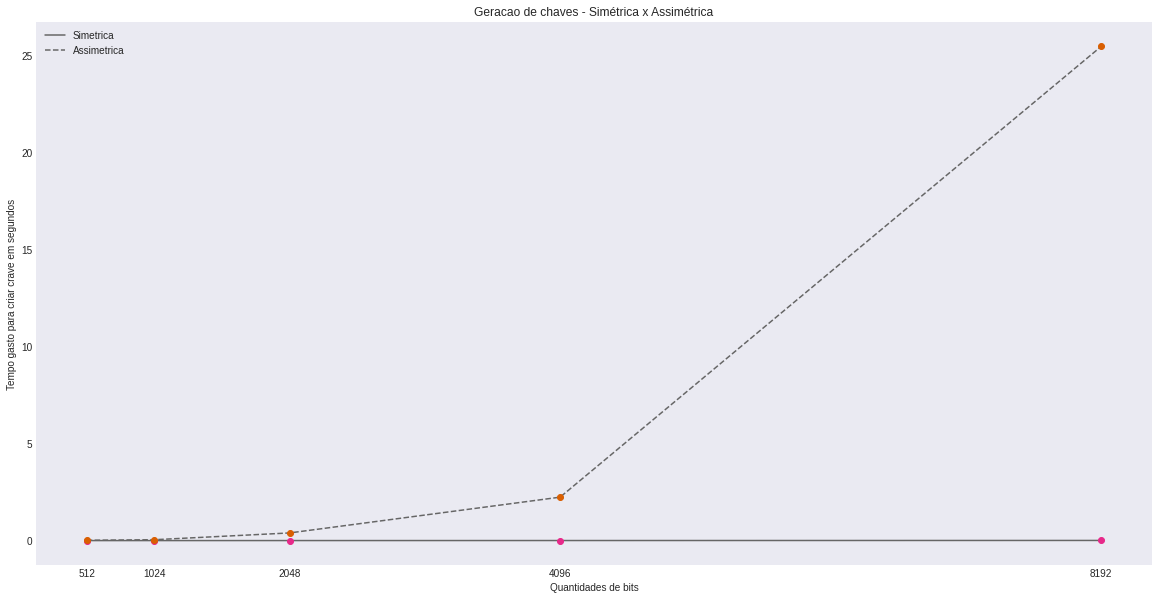

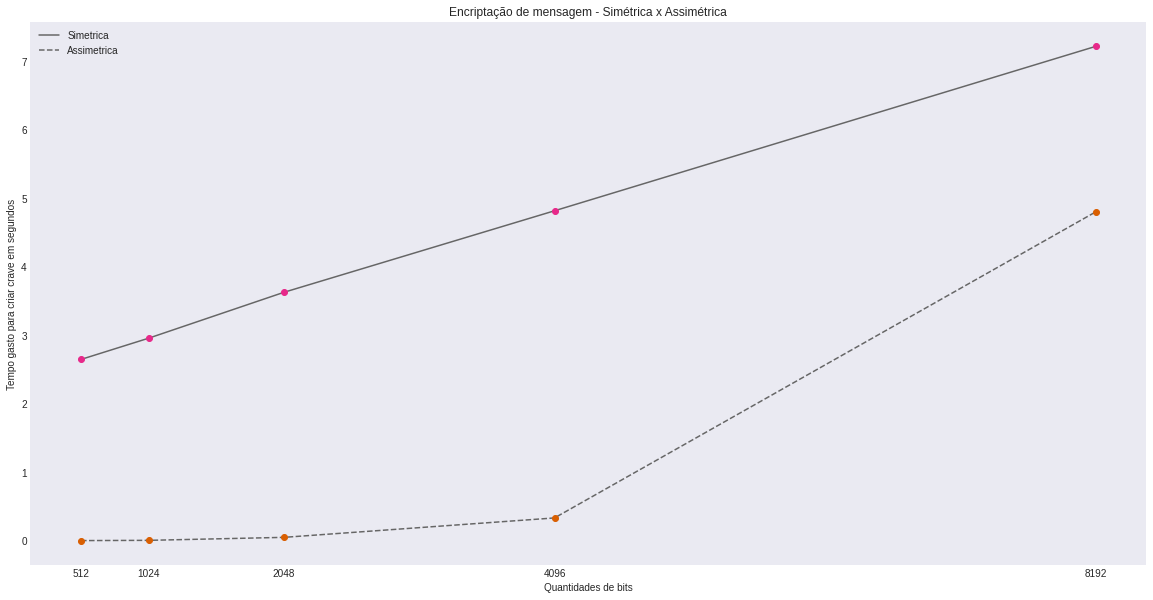

In [ ]:
tempoGeracaoS =[]
tempoEncriptacaoS = []
for i in range(8,len(medGeracao)):
  tempoGeracaoS.append(medGeracao[i])
  tempoEncriptacaoS.append(medEncriptacaoSimetrica[i])

plotagem2(tempoGeracaoS, tempoGeracaoRSA, "Geracao de chaves - Simétrica x Assimétrica", "Quantidades de bits", "Tempo gasto para criar crave em segundos", "Simetrica", "Assimetrica")
plotagem2(tempoEncriptacaoS, tempoEncriptacaoRSA, "Encriptação de mensagem - Simétrica x Assimétrica", "Quantidades de bits", "Tempo gasto para criar crave em segundos", "Simetrica", "Assimetrica")